In [ ]:

import pandas as pd
import numpy as np
import geopandas as gpd


In [ ]:
df = pd.read_csv('/content/merged_file.csv')
df.head()

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,37,Movie,Alive,South Korea,Horror,08-09-2020,False,62%,86%,ARE,https://flixpatrol.com/title/alive-2020,ASI,NaN,NaN,NaN,NaN
1,37,TV Show,Away,USA,Science Fiction,04-09-2020,True,71%,73%,ARE,https://flixpatrol.com/title/away-2020,ASI,NaN,NaN,NaN,NaN
2,36,Movie,Skyscraper,USA,Action,04-07-2018,False,61%,48%,ARE,https://flixpatrol.com/title/skyscraper,ASI,NaN,NaN,NaN,NaN
3,36,TV Show,Lucifer,USA,Superhero,25-01-2016,True,83%,87%,ARE,https://flixpatrol.com/title/lucifer,ASI,NaN,NaN,NaN,NaN
4,35,Movie,Project Power,USA,Action,14-08-2020,True,61%,63%,ARE,https://flixpatrol.com/title/project-power,ASI,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['week', 'show_type', 'title', 'ori_country', 'genre', 'release_date',
       'is_NF_Ori', 'imdb_rating', 'rt_rating', 'country_chart', 'show_link',
       'Continent', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [ ]:
df.drop(columns=['week','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'],inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4194, 11)

In [ ]:
df.columns

Index(['show_type', 'title', 'ori_country', 'genre', 'release_date',
       'is_NF_Ori', 'imdb_rating', 'rt_rating', 'country_chart', 'show_link',
       'Continent'],
      dtype='object')

In [ ]:
df.dropna(subset=['Continent','ori_country'], inplace=True)
df.isna().sum()

,0
show_type,0
title,0
ori_country,0
genre,35
release_date,0
is_NF_Ori,0
imdb_rating,63
rt_rating,524
country_chart,0
show_link,0


In [ ]:
df1 = pd.read_csv('/content/flixpatrol.csv')
df1.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M


In [ ]:
df.columns = df.columns.str.strip()
df1.columns = df1.columns.str.strip()


In [ ]:
df.columns

Index(['show_type', 'title', 'ori_country', 'genre', 'release_date',
       'is_NF_Ori', 'imdb_rating', 'rt_rating', 'country_chart', 'show_link',
       'Continent'],
      dtype='object')

In [ ]:
df1.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [ ]:
df1.rename(columns={'Genre':'genre'},inplace=True)
df1.head(2)

,Rank,Title,Type,Premiere,genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M


In [ ]:
df1 = df1[~df1.Title.duplicated(keep='first')]

# Now that your df1 has unique titles, set the index to 'Title'
df1 = df1.set_index('Title')


# Perform the mapping to fill missing genres in df.
df['genre'] = df['genre'].fillna(df['title'].map(df1['genre']))

In [ ]:
df.isna().sum()

,0
show_type,0
title,0
ori_country,0
genre,6
release_date,0
is_NF_Ori,0
imdb_rating,63
rt_rating,524
country_chart,0
show_link,0


In [ ]:
df.dropna(subset=['genre'], inplace=True)

In [ ]:
df.isna().sum()

,0
show_type,0
title,0
ori_country,0
genre,0
release_date,0
is_NF_Ori,0
imdb_rating,61
rt_rating,518
country_chart,0
show_link,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4095 entries, 0 to 6054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_type      4095 non-null   object
 1   title          4095 non-null   object
 2   ori_country    4095 non-null   object
 3   genre          4095 non-null   object
 4   release_date   4095 non-null   object
 5   is_NF_Ori      4095 non-null   bool  
 6   imdb_rating    4034 non-null   object
 7   rt_rating      3577 non-null   object
 8   country_chart  4095 non-null   object
 9   show_link      4095 non-null   object
 10  Continent      4095 non-null   object
dtypes: bool(1), object(10)
memory usage: 355.9+ KB


In [ ]:
df['imdb_rating'] = df['imdb_rating'].str.replace('%', '', regex=True).astype(float)


In [ ]:
df['imdb_rating'].unique()

array([62., 71., 61., 83., 14., 88., 43., 80., 75., nan, 82., 70., 87.,
       35., 65., 84., 59., 72., 68., 56., 58., 63., 57., 66., 55., 78.,
       69., 77., 51., 67., 52., 94., 74., 42., 81., 50., 73., 93., 76.,
       39., 53., 64., 60., 28., 46., 79., 86., 89., 90., 40., 15., 31.,
       54., 38., 44.,  0., 26., 48., 92., 34.])

In [ ]:
df['imdb_rating'].value_counts()

,count
imdb_rating,
61.0,381
83.0,283
70.0,240
62.0,202
78.0,192
82.0,180
84.0,173
55.0,140
69.0,139


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='imdb_rating', ylabel='Density'>

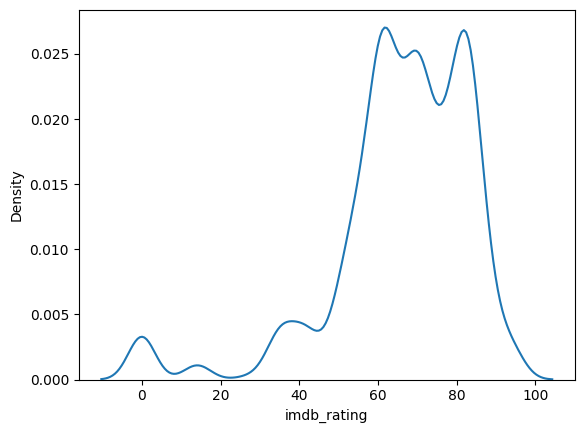

In [ ]:
sns.kdeplot(df['imdb_rating'])

<Axes: xlabel='imdb_rating', ylabel='Count'>

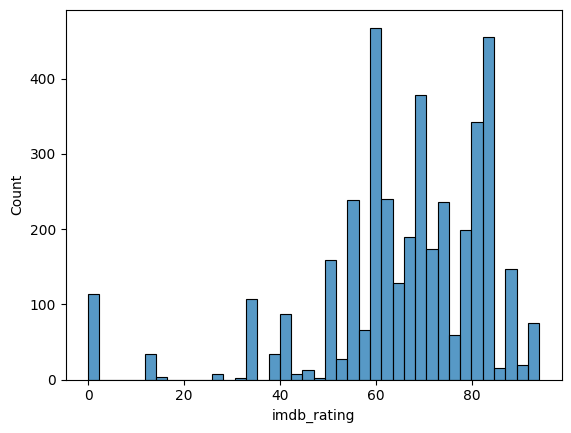

In [ ]:
sns.histplot(df['imdb_rating'])

<Axes: ylabel='imdb_rating'>

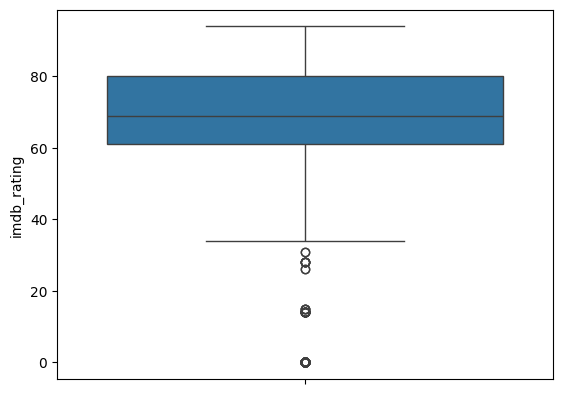

In [ ]:
sns.boxplot(df['imdb_rating'])

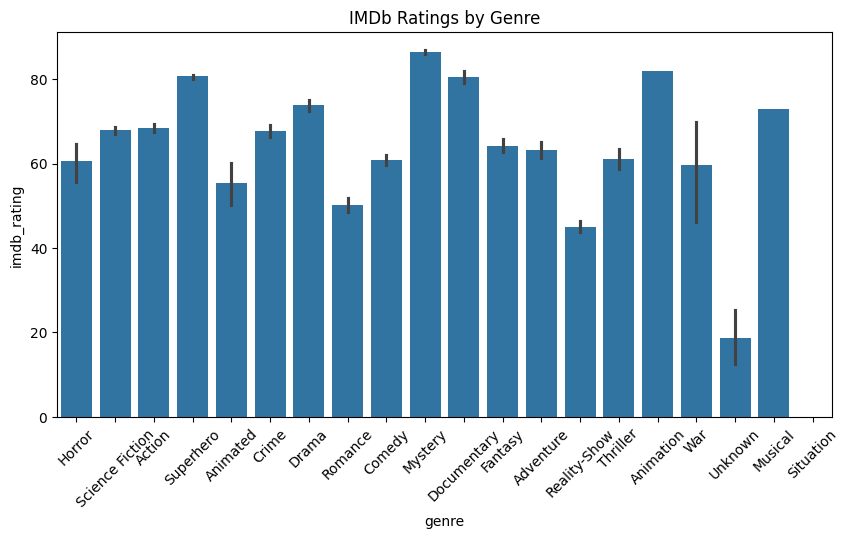

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['genre'], y=df['imdb_rating'])
plt.xticks(rotation=45)
plt.title('IMDb Ratings by Genre')
plt.show()


In [ ]:
df['imdb_rating'] = df.groupby('genre')['imdb_rating'].transform(lambda x: x.fillna(x.median()))


In [ ]:
df.isna().sum()

,0
show_type,0
title,0
ori_country,0
genre,0
release_date,0
is_NF_Ori,0
imdb_rating,0
rt_rating,518
country_chart,0
show_link,0


<Axes: xlabel='imdb_rating', ylabel='Density'>

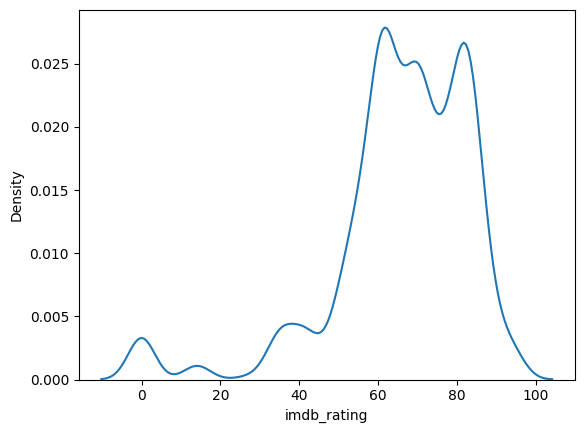

In [ ]:
sns.kdeplot(df['imdb_rating'])

In [ ]:
df['rt_rating'].unique()

array(['86%', '73%', '48%', '87%', '63%', '8%', '94%', nan, '93%', '100%',
       '28%', '14%', '80%', '35%', '90%', '39%', '79%', '64%', '49%',
       '25%', '38%', '68%', '83%', '56%', '34%', '50%', '62%', '71%',
       '82%', '58%', '69%', '53%', '76%', '31%', '41%', '21%', '97%',
       '27%', '37%', '19%', '29%', '26%', '40%', '51%', '91%', '15%',
       '98%', '46%', '47%', '22%', '65%', '20%', '9%', '92%', '10%',
       '67%', '17%', '74%', '88%', '55%', '84%', '95%', '70%', '33%',
       '75%', '43%', '77%', '13%', '60%', '66%', '99%', '44%', '54%',
       '72%', '81%', '57%', '23%', '86', '0', '65', '20', '87', '50',
       '73', '94', '29', '63', '82', '28', '40', '69', '80', '62', '15',
       '91', '90', '39', '93', '41', '76', '25', '64', '97', '68', '98',
       '37', '46', '95', '48', '100', '14', '77', '8', '49', '35', '58',
       '92', '31', '27', '79', '19', '33', '75', '74', '51', '88', '34',
       '56', '43', '71', '53', '21', '47', '83', '70', '96', '22', '57',
 

In [ ]:
df['rt_rating'] = df['rt_rating'].str.replace('%','',regex = True).astype(float)

In [ ]:
df['rt_rating'].unique()

array([ 86.,  73.,  48.,  87.,  63.,   8.,  94.,  nan,  93., 100.,  28.,
        14.,  80.,  35.,  90.,  39.,  79.,  64.,  49.,  25.,  38.,  68.,
        83.,  56.,  34.,  50.,  62.,  71.,  82.,  58.,  69.,  53.,  76.,
        31.,  41.,  21.,  97.,  27.,  37.,  19.,  29.,  26.,  40.,  51.,
        91.,  15.,  98.,  46.,  47.,  22.,  65.,  20.,   9.,  92.,  10.,
        67.,  17.,  74.,  88.,  55.,  84.,  95.,  70.,  33.,  75.,  43.,
        77.,  13.,  60.,  66.,  99.,  44.,  54.,  72.,  81.,  57.,  23.,
         0.,  96.,  89.,  85.,  36.,  30.,  32.,  18.,  52.,  12.])

<Axes: xlabel='imdb_rating', ylabel='rt_rating'>

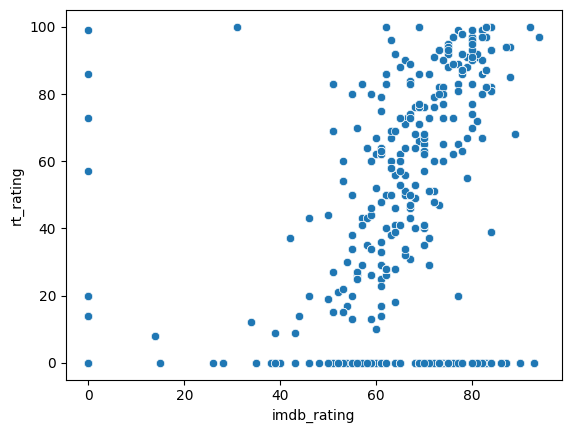

In [ ]:
sns.scatterplot(x=df['imdb_rating'], y=df['rt_rating'])

<Axes: xlabel='rt_rating', ylabel='Density'>

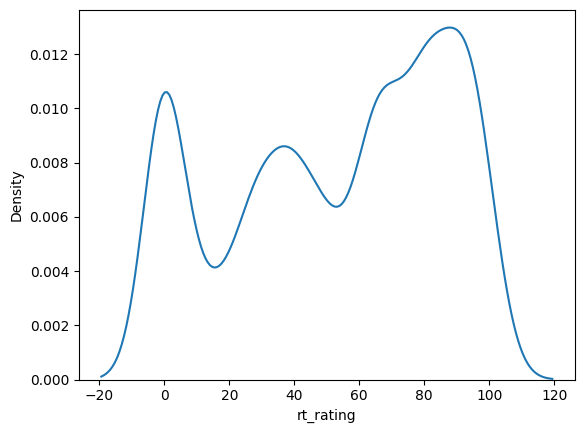

In [ ]:
sns.kdeplot(df['rt_rating'])

In [ ]:
correlation = df['rt_rating'].corr(df['imdb_rating'])
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.53


In [ ]:
df['rt_rating'] = df.groupby('imdb_rating')['rt_rating'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
df.isna().sum()

,0
show_type,0
title,0
ori_country,0
genre,0
release_date,0
is_NF_Ori,0
imdb_rating,0
rt_rating,0
country_chart,0
show_link,0


<Axes: xlabel='rt_rating', ylabel='Density'>

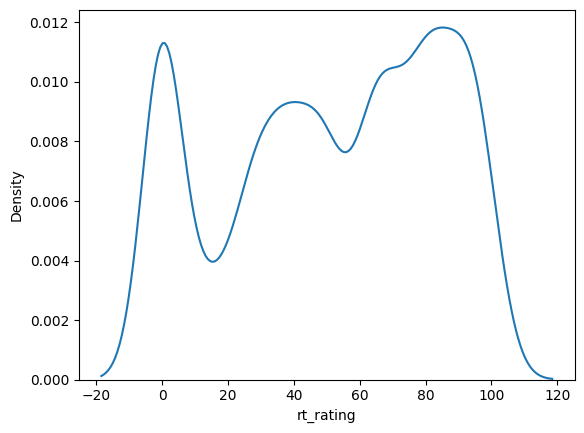

In [ ]:
sns.kdeplot(df['rt_rating'])

In [ ]:

df.head()

,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent
0,Movie,Alive,South Korea,Horror,08-09-2020,False,62.0,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI
1,TV Show,Away,USA,Science Fiction,04-09-2020,True,71.0,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI
2,Movie,Skyscraper,USA,Action,04-07-2018,False,61.0,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI
3,TV Show,Lucifer,USA,Superhero,25-01-2016,True,83.0,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI
4,Movie,Project Power,USA,Action,14-08-2020,True,61.0,63.0,ARE,https://flixpatrol.com/title/project-power,ASI


In [ ]:
df['release_date'].unique()

array(['08-09-2020', '04-09-2020', '04-07-2018', '25-01-2016',
       '14-08-2020', '28-07-2017', '02-05-2018', '20-08-2020',
       '13-11-2017', '20-04-2015', '24-07-2020', '15-07-2020',
       '10-07-2020', '14-09-2017', '01-12-2017', '19-06-2020',
       '02-08-2017', '07-06-2020', '12-06-2020', '31-03-2017',
       '28-05-2020', '27-05-2020', '15-05-2020', '06-04-2017',
       '13-05-2020', '08-05-2020', '15-11-1996', '01-05-2020',
       '24-04-2020', '29-04-2020', '27-02-2015', '10-08-2018',
       '10-04-2020', '02-05-2017', '03-04-2020', '03-09-2020',
       '21-12-2018', '21-08-2020', '25-11-2018', '07-08-2020',
       '15-02-2019', '30-10-2019', '26-02-2018', '08-11-2018',
       '17-07-2020', '02-07-2020', '01-03-2012', '20-12-2017',
       '22-03-2017', '29-05-2020', '20-09-2019', '19-04-2020',
       '27-09-2018', '13-07-2018', '03-04-2015', '17-04-2020',
       '06-12-2019', '20-03-2020', '03-10-2018', '22-01-2016',
       '31-05-2019', '14-11-2018', '19-07-2018', '23-09

In [ ]:
df = df[df['release_date'] != 'Comedy']


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'],format='%d-%m-%Y')


<ipython-input-42-3715f2edda05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'],format='%d-%m-%Y')


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'],format='%d-%m-%Y')


df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month

<ipython-input-43-5a1a0197f992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = pd.to_datetime(df['release_date'],format='%d-%m-%Y')
<ipython-input-43-5a1a0197f992>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['release_date'].dt.year
<ipython-input-43-5a1a0197f992>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
df.head()

,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,2020-09-08,False,62.0,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,2020-09-04,True,71.0,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,2018-07-04,False,61.0,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83.0,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,2020-08-14,True,61.0,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
df.drop(columns = 'release_date',inplace=True)

<ipython-input-45-0e574c561534>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'release_date',inplace=True)


In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,62.0,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,71.0,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,61.0,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,83.0,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,61.0,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
df['Year'].value_counts()

,count
Year,
2020,2198
2017,491
2018,436
2019,331
2016,197
2015,99
2013,67
2014,45
2012,38


In [ ]:
new = df.copy()


In [ ]:
new.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,62.0,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,71.0,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,61.0,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,83.0,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,61.0,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14509 entries, The Night Agent to The Promised Land
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  14509 non-null  float64
 1   Type                  14509 non-null  object 
 2   Premiere              14396 non-null  float64
 3   genre                 14354 non-null  object 
 4   Watchtime             14509 non-null  object 
 5   Watchtime in Million  14509 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
df1.shape
df1.dropna(inplace=True)
df1.isna().sum()

,0
Rank,0
Type,0
Premiere,0
genre,0
Watchtime,0
Watchtime in Million,0


In [ ]:
# df1['Watchtime in Million'].unique()
df1.rename(columns={'Watchtime in Million':'WM'},inplace=True)
df1.head(3)

,Rank,Type,Premiere,genre,Watchtime,WM
Title,,,,,,
The Night Agent,1.0,TV Show,2023.0,Action,"812,100,000",812.1M
Ginny & Georgia,2.0,TV Show,2021.0,Drama,"665,100,000",665.1M
The Glory,3.0,TV Show,2022.0,Thriller,"622,800,000",622.8M


In [ ]:
df1['WM'] = df1['WM'].str.replace('M','',regex = True).astype(float)
df1['WM'] = df1['WM'].apply(lambda x: f"{x:.2f}")  # Keeps two decimal places as a string


In [ ]:
df1['WM'].astype(float)

,WM
Title,
The Night Agent,812.1
Ginny & Georgia,665.1
The Glory,622.8
Wednesday,507.7
Queen Charlotte: A Bridgerton Story,503.0
...,...
Spiritual House,0.1
Suite Francaise,0.1
The Bishop's Bedroom,0.1


In [ ]:
df1['WM'].unique()

array(['812.10', '665.10', '622.80', '507.70', '503.00', '440.60',
       '429.60', '402.50', '266.20', '262.60', '252.50', '251.50',
       '249.90', '235.00', '234.80', '229.70', '221.10', '214.10',
       '209.70', '206.50', '205.50', '201.80', '200.70', '194.70',
       '192.90', '182.30', '181.80', '176.80', '175.50', '174.30',
       '173.60', '172.40', '170.10', '168.30', '163.00', '162.00',
       '161.10', '157.60', '155.30', '153.00', '152.10', '151.50',
       '149.30', '148.60', '146.90', '146.70', '142.90', '140.10',
       '139.90', '139.30', '136.80', '136.60', '136.20', '135.90',
       '134.80', '133.60', '132.10', '129.20', '129.10', '124.40',
       '120.70', '120.50', '120.30', '120.00', '118.90', '118.60',
       '116.20', '115.80', '113.60', '104.60', '104.50', '102.80',
       '101.70', '99.90', '99.00', '98.50', '97.80', '96.40', '95.80',
       '95.10', '94.60', '94.30', '94.20', '92.90', '92.30', '90.80',
       '90.20', '88.60', '87.90', '87.30', '87.20', '86

In [ ]:
df_new = df1[(df1['genre'] == 'Crime') & (df1['Premiere'].between(2000, 2023))].sort_values(by='WM', ascending=False)


In [ ]:
df_new.columns = df_new.columns.str.strip()

In [ ]:
df_new.head()

,Rank,Type,Premiere,genre,Watchtime,WM
Title,,,,,,
The Blacklist,91.0,TV Show,2013.0,Crime,"99,900,000",99.90
Biz Kimden Kaçıyorduk Anne?,108.0,TV Show,2023.0,Crime,"92,900,000",92.90
Once Upon a Time… in Hollywood,2088.0,Movie,2019.0,Crime,"9,800,000",9.80
The Penthouse,2160.0,TV Show,2020.0,Crime,"9,400,000",9.40
Next Day Air,2170.0,Movie,2009.0,Crime,"9,300,000",9.30


In [ ]:
df_new = df_new.reset_index()


In [ ]:
df_new.to_csv('new.csv',index = False)

***Most*** ***Viewed***

In [ ]:
print(df_new['Title'].head(5))

0                     The Blacklist
1       Biz Kimden Kaçıyorduk Anne?
2    Once Upon a Time… in Hollywood
3                     The Penthouse
4                      Next Day Air
Name: Title, dtype: object


In [ ]:
df_new1 = df1[(df1['genre'] == 'Crime') & (df1['Premiere'].between(2010, 2020))].sort_values(by='WM', ascending=True)


In [ ]:
df_new1 = df_new1.reset_index()


***Least*** ***Viewed***

In [ ]:
print(df_new1['Title'].head(5))

0    The Promised Land
1       Perfect Number
2                 Yuma
3           Mafia Inc.
4             The Gulf
Name: Title, dtype: object


***Histogram***

<Axes: xlabel='WM', ylabel='Count'>

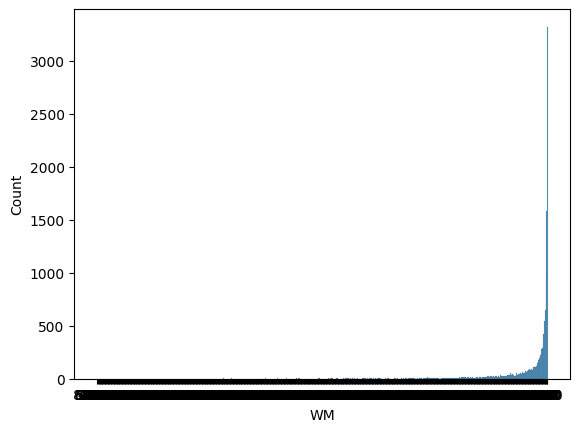

In [ ]:
sns.histplot(df1['WM'])

<Axes: xlabel='genre', ylabel='Count'>

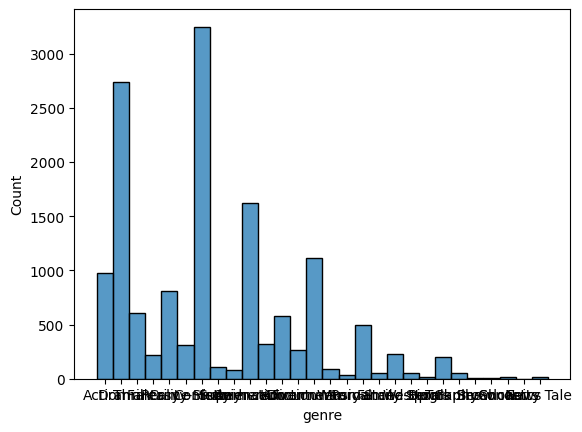

In [ ]:
sns.histplot(df1['genre'])

In [ ]:
df1['Premiere'].value_counts()

,count
Premiere,
2022.0,1446
2019.0,1426
2021.0,1360
2020.0,1331
2018.0,1294
...,...
1965.0,1
1951.0,1
1955.0,1


<Axes: xlabel='Premiere', ylabel='Count'>

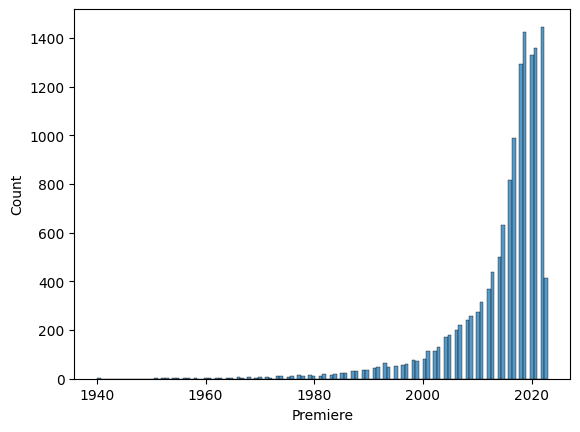

In [ ]:
sns.histplot(df1['Premiere'])

# ***Movie Recommendor System***

# Done on VS Code ->

# ***5 Problems that can be extracted by the given Data***

In [ ]:
df1.head(5)

,Rank,Type,Premiere,genre,Watchtime,WM
Title,,,,,,
The Night Agent,1.0,TV Show,2023.0,Action,"812,100,000",812.10
Ginny & Georgia,2.0,TV Show,2021.0,Drama,"665,100,000",665.10
The Glory,3.0,TV Show,2022.0,Thriller,"622,800,000",622.80
Wednesday,4.0,TV Show,2022.0,Fantasy,"507,700,000",507.70
Queen Charlotte: A Bridgerton Story,5.0,TV Show,2023.0,Drama,"503,000,000",503.00


In [ ]:
df1['WM'] = df1['WM'].astype(float)

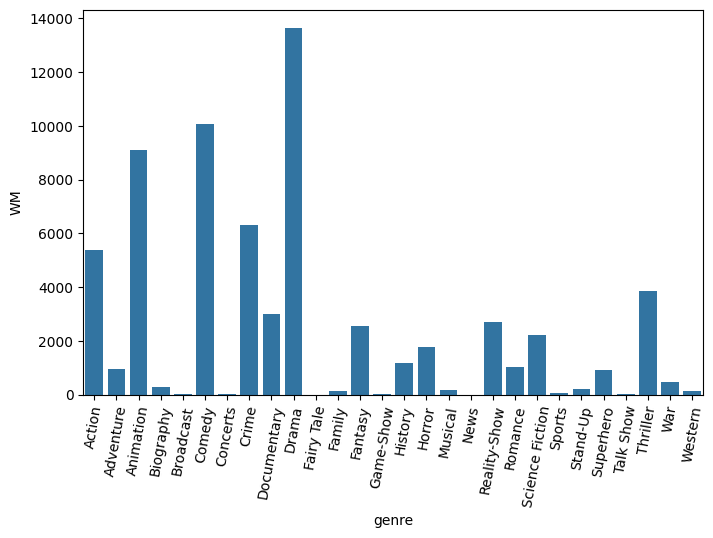

In [ ]:
genre_watch_time = df1.groupby('genre')['WM'].sum().reset_index()
genre_watch_time
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='WM', data=genre_watch_time)
plt.xticks(rotation=80)
plt.show()

Top 5 Movies by Genre

In [ ]:
genre_watch_time.sort_values(by='WM', ascending=False).iloc[np.r_[0:5]]


,genre,WM
9,Drama,13639.7
5,Comedy,10068.7
2,Animation,9115.2
7,Crime,6314.6
0,Action,5377.2


Bottom 5 Movies by Genre

In [ ]:
genre_watch_time.sort_values(by='WM', ascending=False).iloc[np.r_[-5:0]]

,genre,WM
13,Game-Show,12.8
4,Broadcast,11.5
6,Concerts,11.3
10,Fairy Tale,2.0
17,News,1.4


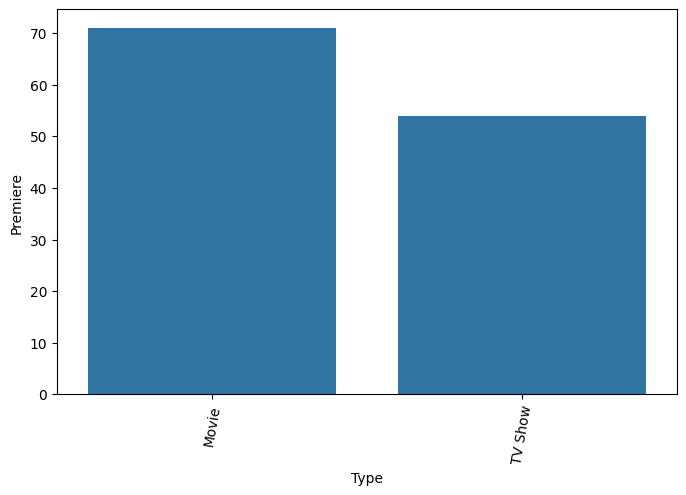

In [ ]:
genre_watch_time = df1.groupby('Type')['Premiere'].nunique().reset_index()
genre_watch_time
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Premiere', data=genre_watch_time)
plt.xticks(rotation=80)
plt.show()

<ipython-input-75-8172a5d2ecb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Premiere'])


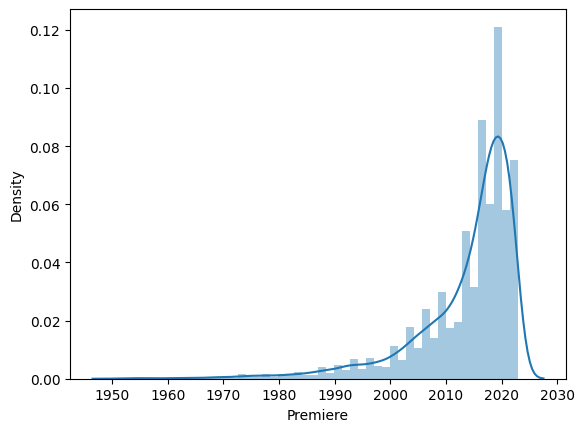

In [ ]:
data = df1[df1['Type'] == 'Movie']
sns.distplot(data['Premiere'])
plt.show()

<ipython-input-76-4ee71017ad31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Premiere'])


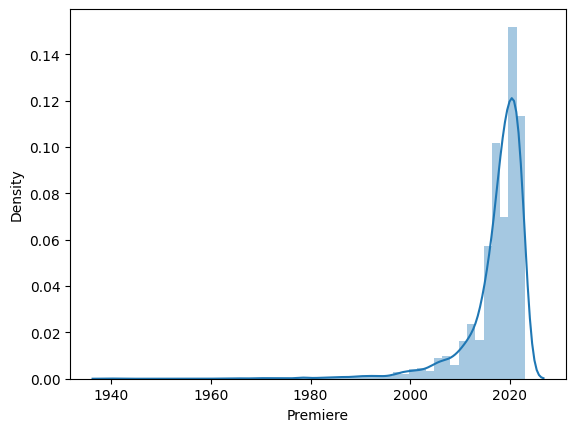

In [ ]:
data = df1[df1['Type'] == 'TV Show']
sns.distplot(data['Premiere'])
plt.show()

In [ ]:
df1.head()

,Rank,Type,Premiere,genre,Watchtime,WM
Title,,,,,,
The Night Agent,1.0,TV Show,2023.0,Action,"812,100,000",812.1
Ginny & Georgia,2.0,TV Show,2021.0,Drama,"665,100,000",665.1
The Glory,3.0,TV Show,2022.0,Thriller,"622,800,000",622.8
Wednesday,4.0,TV Show,2022.0,Fantasy,"507,700,000",507.7
Queen Charlotte: A Bridgerton Story,5.0,TV Show,2023.0,Drama,"503,000,000",503.0


In [ ]:
new = np.sort(df1['Premiere'].unique())

In [ ]:
len(new)

73

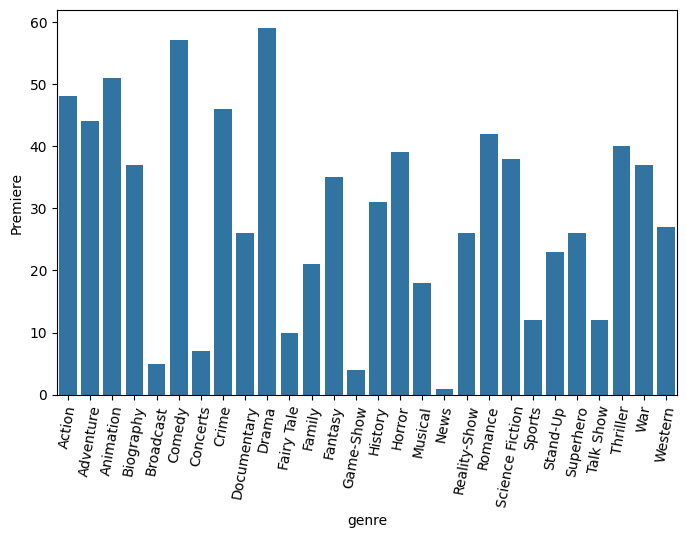

In [ ]:
genre_watch_time = df1.groupby('genre')['Premiere'].nunique().reset_index()
genre_watch_time
# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='genre', y='Premiere', data=genre_watch_time)
plt.xticks(rotation=80)
plt.show()

<ipython-input-81-3b9bfd86d6d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_watch_time = df1.groupby('Premiere_Binned')['WM'].nunique().reset_index()


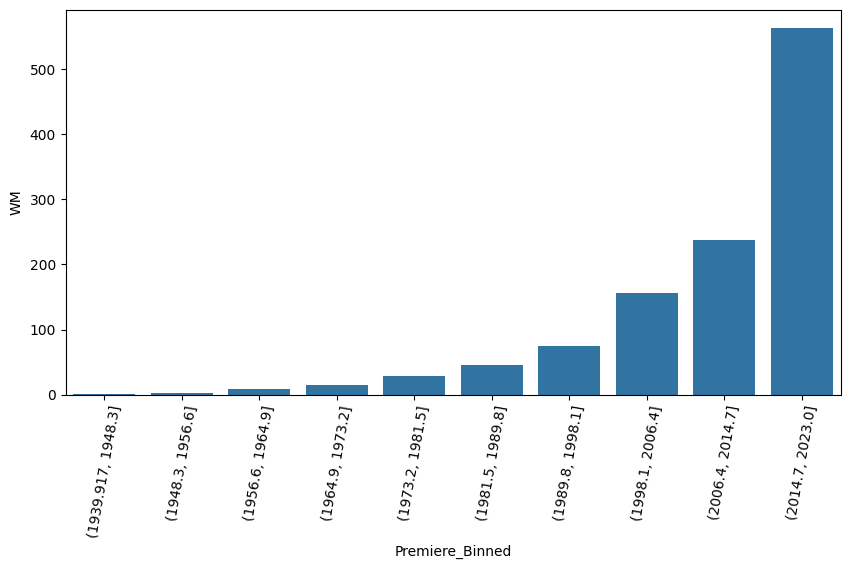

In [ ]:
df1['Premiere_Binned'] = pd.cut(df1['Premiere'], bins=10)
genre_watch_time = df1.groupby('Premiere_Binned')['WM'].nunique().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Premiere_Binned', y='WM', data=genre_watch_time)
plt.xticks(rotation=80)
plt.show()

<Figure size 1200x600 with 0 Axes>

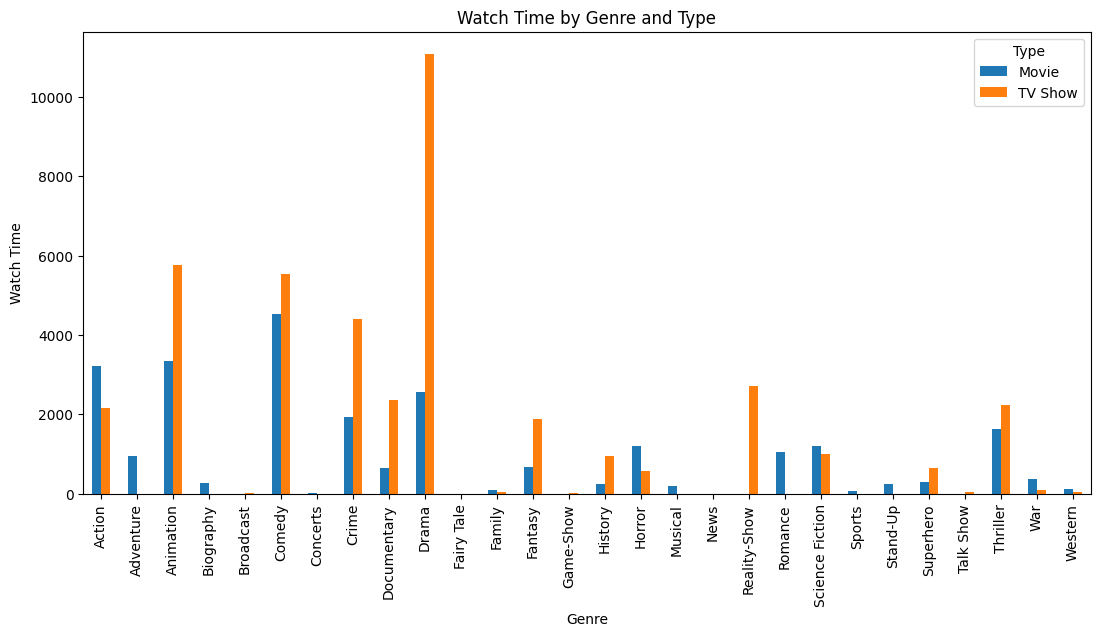

In [ ]:
genre_watch_time = df1.groupby(['genre', 'Type'])['WM'].sum().reset_index()

pivot_table = genre_watch_time.pivot(index='genre', columns='Type', values='WM')


plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', figsize=(13, 6), width=0.5)

plt.xlabel("Genre")
plt.ylabel("Watch Time")
plt.title("Watch Time by Genre and Type")
plt.xticks(rotation=90)
plt.legend(title="Type")


plt.show()


# **2nd pdf question starts here**

In [ ]:
df.head(3)

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,62.0,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,71.0,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,61.0,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7


In [ ]:
print(df.loc[df['imdb_rating'] >= 75, ['title','ori_country','imdb_rating']])

                  title ori_country  imdb_rating
3               Lucifer         USA         83.0
7             Cobra Kai         USA         88.0
11              Lucifer         USA         83.0
14               Wonder         USA         80.0
15            Locked Up       Spain         83.0
...                 ...         ...          ...
6038      A Quiet Place         USA         80.0
6043         Dead to Me         USA         80.0
6045      Modern Family         USA         84.0
6047  Never Have I Ever         USA         78.0
6051        Money Heist       Spain         84.0

[1432 rows x 3 columns]


In [ ]:
df_filtered = df.loc[
    (df['imdb_rating'] > 60) &
    (df['rt_rating'] >= 50) &
    (df['Month'] > 6) &
    (df['show_type'] == 'TV Show') &
    (df['ori_country'].isin(['USA', 'Germany', 'India'])),
    ['title', 'show_type', 'ori_country','Month']
]

print(df_filtered)


                    title show_type ori_country  Month
1                    Away   TV Show         USA      9
25                   Dark   TV Show     Germany     12
29             The Sinner   TV Show         USA      8
55                   Away   TV Show         USA      9
61             Dirty John   TV Show         USA     11
...                   ...       ...         ...    ...
6009                 Away   TV Show         USA      9
6027          Warrior Nun   TV Show         USA      7
6029   Unsolved Mysteries   TV Show         USA      7
6033  The Big Bang Theory   TV Show         USA      9
6045        Modern Family   TV Show         USA      9

[254 rows x 4 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 0 to 6054
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_type      4094 non-null   object 
 1   title          4094 non-null   object 
 2   ori_country    4094 non-null   object 
 3   genre          4094 non-null   object 
 4   is_NF_Ori      4094 non-null   bool   
 5   imdb_rating    4094 non-null   float64
 6   rt_rating      4094 non-null   float64
 7   country_chart  4094 non-null   object 
 8   show_link      4094 non-null   object 
 9   Continent      4094 non-null   object 
 10  Year           4094 non-null   int32  
 11  Month          4094 non-null   int32  
dtypes: bool(1), float64(2), int32(2), object(7)
memory usage: 355.8+ KB


In [ ]:
df['imdb_rating'].unique()

array([62. , 71. , 61. , 83. , 14. , 88. , 43. , 80. , 75. , 82. , 70. ,
       87. , 35. , 65. , 84. , 59. , 72. , 68. , 56. , 58. , 63. , 57. ,
       66. , 55. , 78. , 69. , 77. , 51. , 67. , 52. , 94. , 74. , 42. ,
       81. , 50. , 73. , 93. , 76. , 39. , 53. , 64. , 60. , 28. , 46. ,
       79. , 86. , 89. , 90. , 40. , 15. , 31. , 66.5, 54. , 38. , 44. ,
        0. , 26. , 48. , 92. , 34. ])

In [ ]:
df['imdb_rating'] = df['imdb_rating']/10

In [ ]:
df['imdb_rating'].unique()

array([6.2 , 7.1 , 6.1 , 8.3 , 1.4 , 8.8 , 4.3 , 8.  , 7.5 , 8.2 , 7.  ,
       8.7 , 3.5 , 6.5 , 8.4 , 5.9 , 7.2 , 6.8 , 5.6 , 5.8 , 6.3 , 5.7 ,
       6.6 , 5.5 , 7.8 , 6.9 , 7.7 , 5.1 , 6.7 , 5.2 , 9.4 , 7.4 , 4.2 ,
       8.1 , 5.  , 7.3 , 9.3 , 7.6 , 3.9 , 5.3 , 6.4 , 6.  , 2.8 , 4.6 ,
       7.9 , 8.6 , 8.9 , 9.  , 4.  , 1.5 , 3.1 , 6.65, 5.4 , 3.8 , 4.4 ,
       0.  , 2.6 , 4.8 , 9.2 , 3.4 ])

In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


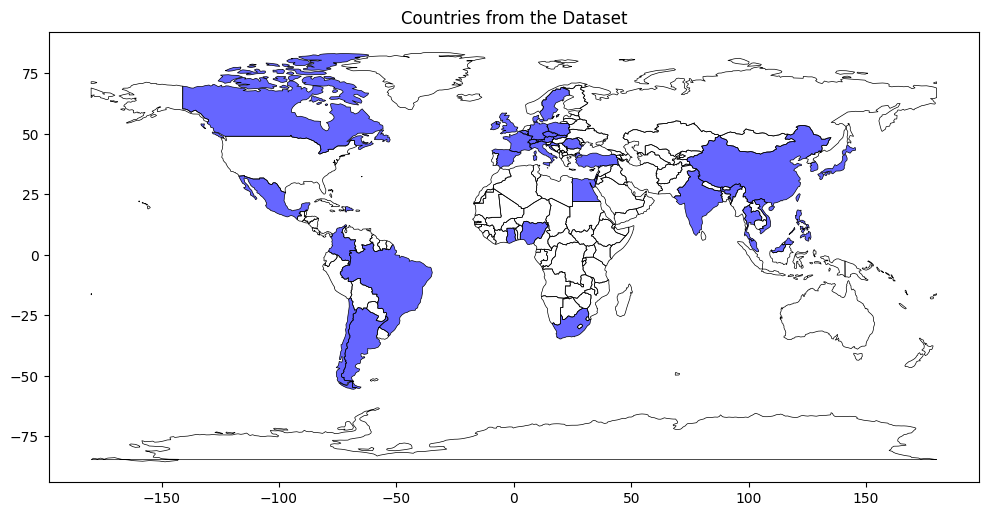

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map from an online GeoJSON source
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)

countries_list = df['ori_country'].unique()



filtered_countries = world[world['name'].isin(countries_list)]

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=0.5, color='black')
filtered_countries.plot(ax=ax, color='blue', alpha=0.6)

plt.title("Countries from the Dataset")
plt.show()


In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
temp_df = df[['ori_country','genre']]

In [ ]:
import pandas as pd


# Creating a pivot table
pivot_table = pd.pivot_table(df, index=temp_df['ori_country'], columns=temp_df['genre'], aggfunc='size', fill_value=0)

pivot_table = pd.DataFrame(pivot_table)


In [ ]:
pivot_table

genre,Action,Adventure,Animated,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Reality-Show,Romance,Science Fiction,Situation,Superhero,Thriller,Unknown,War
ori_country,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0
Belgium,0,0,2,0,0,2,0,0,0,0,0,0,0,0,6,0,0,0,0,0
Brazil,0,0,0,0,4,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0
Canada,0,0,2,0,0,0,0,0,0,0,0,0,0,0,22,0,0,0,0,0
Chile,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
China,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Colombia,1,0,0,0,4,6,0,9,0,0,0,0,0,0,0,0,0,0,23,0
Croatia,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


Q1.By making a strong analysis in the data we conclude that most of the movies are taken from USA.......

In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
pivot_table = pd.pivot_table(df, index=df['genre'], columns=df['Month'], aggfunc='size', fill_value=0) # Use df['Month'] instead of temp_df['Month']

pivot_table = pd.DataFrame(pivot_table)

In [ ]:
pivot_table

Month,1,2,3,4,5,6,7,8,9,10,11,12
genre,,,,,,,,,,,,
Action,11,8,2,125,115,34,54,171,35,17,24,2
Adventure,0,4,2,8,0,2,0,0,9,0,0,16
Animated,0,0,14,6,2,10,47,8,6,6,12,20
Animation,0,0,0,1,0,0,0,0,0,16,0,0
Comedy,12,27,21,132,204,73,46,147,113,5,24,4
Crime,4,20,10,8,50,51,12,35,52,16,0,4
Documentary,2,0,22,99,42,2,35,2,0,0,2,0
Drama,16,4,104,68,48,32,63,27,4,46,53,12
Fantasy,0,2,34,18,0,2,147,0,0,0,18,0


In [ ]:
max_months = pivot_table.idxmax(axis=1)


result_df = pd.DataFrame({'Max_Month': max_months})
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
for i in result_df['Max_Month']:
  result_df['Max_Month'] = result_df['Max_Month'].replace(i,month_dict[i])


print(result_df)

                 Max_Month
genre                     
Action              August
Adventure         December
Animated              July
Animation          October
Comedy                 May
Crime            September
Documentary          April
Drama                March
Fantasy               July
Horror           September
Musical               July
Mystery           December
Reality-Show         April
Romance               July
Science Fiction      March
Situation          January
Superhero             July
Thriller             April
Unknown            January
War                January


Q2. Out put a table of content having maximun genre moving release in which month


In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
df.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False).head(10)

,imdb_rating
genre,
Mystery,8.647500
Animation,8.200000
Superhero,8.061839
Documentary,8.046602
Drama,7.382180
Musical,7.300000
Action,6.843645
Science Fiction,6.785537
Crime,6.775573


Q3.Genre with imdb

In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
t1 = pd.pivot_table(df, index=df['Continent'], columns=df['show_type'], aggfunc='size', fill_value=0)
t1 = pd.DataFrame(t1)
t1

show_type,Documentary,Documentary TV,Movie,Short,TV Show
Continent,,,,,
AFR,2,2,120,0,87
AME,10,40,592,0,394
ASI,12,12,516,4,242
EUR,27,73,1000,2,810
OCE,0,8,89,0,52


Q4. continent with showtype


In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
df.groupby('genre')['rt_rating'].mean().sort_values(ascending=False).head(10)

,rt_rating
genre,
Mystery,92.200000
Musical,80.000000
Superhero,77.158621
Documentary,62.447129
Action,62.274279
Horror,60.509303
Fantasy,54.462310
Science Fiction,54.105124
Drama,51.028091


Q5. Rt_rating vs genre

In [ ]:
up_date=df[['genre','imdb_rating']]

In [ ]:
def classify_movie(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 5.0:
        return "Average"
    else:
        return "Bad"
up_date['Category'] = up_date['imdb_rating'].apply(classify_movie)


<ipython-input-141-22f3d88ebd20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_date['Category'] = up_date['imdb_rating'].apply(classify_movie)


In [ ]:
new_pivort = pd.pivot_table(up_date, index=up_date['genre'], columns=up_date['Category'], aggfunc='size', fill_value=0)
new_pivort = pd.DataFrame(new_pivort)
new_pivort.sort_values(by='Good',ascending=False)

Category,Average,Bad,Good
genre,,,
Superhero,49,2,384
Drama,138,18,321
Comedy,596,51,161
Action,415,29,154
Documentary,57,0,149
Mystery,0,0,80
Crime,176,7,79
Fantasy,191,0,30
Animated,73,36,22


Q6. categories imdb into three part good bad and avergae and form a data frame and genre

In [ ]:
s_df = df[['title','Month']]
s_df

,title,Month
0,Alive,9
1,Away,9
2,Skyscraper,7
3,Lucifer,1
4,Project Power,8
...,...,...
6049,Too Hot to Handle,4
6050,Code 8,12
6051,Money Heist,5
6052,Fifty Shades Freed,2


In [ ]:
def half_month(x):
  if x>6:
    return "Second"
  else:
    return "First"
s_df['Half_Month'] = s_df['Month'].apply(half_month)

<ipython-input-152-76d114317142>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df['Half_Month'] = s_df['Month'].apply(half_month)


In [ ]:
s_df['Half_Month'].value_counts()

,count
Half_Month,
First,2148
Second,1946


Q7. Most movies in first half


In [ ]:
df.head()

,show_type,title,ori_country,genre,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,Year,Month
0,Movie,Alive,South Korea,Horror,False,6.2,86.0,ARE,https://flixpatrol.com/title/alive-2020,ASI,2020,9
1,TV Show,Away,USA,Science Fiction,True,7.1,73.0,ARE,https://flixpatrol.com/title/away-2020,ASI,2020,9
2,Movie,Skyscraper,USA,Action,False,6.1,48.0,ARE,https://flixpatrol.com/title/skyscraper,ASI,2018,7
3,TV Show,Lucifer,USA,Superhero,True,8.3,87.0,ARE,https://flixpatrol.com/title/lucifer,ASI,2016,1
4,Movie,Project Power,USA,Action,True,6.1,63.0,ARE,https://flixpatrol.com/title/project-power,ASI,2020,8


In [ ]:
d_df = df[['show_type','Year']]

<Figure size 1200x600 with 0 Axes>

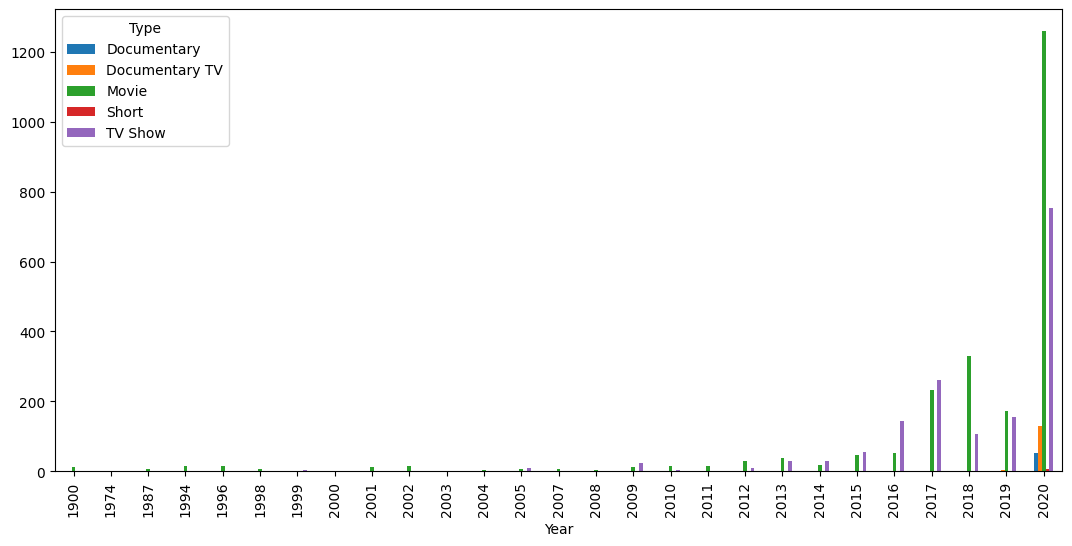

In [ ]:
pivot_table = pd.pivot_table(d_df, index=d_df['Year'], columns=d_df['show_type'], aggfunc='size', fill_value=0)
pivot_table = pd.DataFrame(pivot_table)

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', figsize=(13, 6), width=0.5)

# plt.xlabel("Genre")
# plt.ylabel("Watch Time")
# plt.title("Watch Time by Genre and Type")
# plt.xticks(rotation=90)
plt.legend(title="Type")


plt.show()

Q8- Trends of show type yearwise

      ori_country               title  imdb_rating Category
0     South Korea               Alive          6.2  Average
1             USA                Away          7.1  Average
2             USA          Skyscraper          6.1  Average
3             USA             Lucifer          8.3     Good
4             USA       Project Power          6.1  Average
...           ...                 ...          ...      ...
6049          USA   Too Hot to Handle          4.2      Bad
6050       Canada              Code 8          6.1  Average
6051        Spain         Money Heist          8.4     Good
6052          USA  Fifty Shades Freed          3.4      Bad
6054          USA     Coffee & Kareem          5.0  Average

[4094 rows x 4 columns]


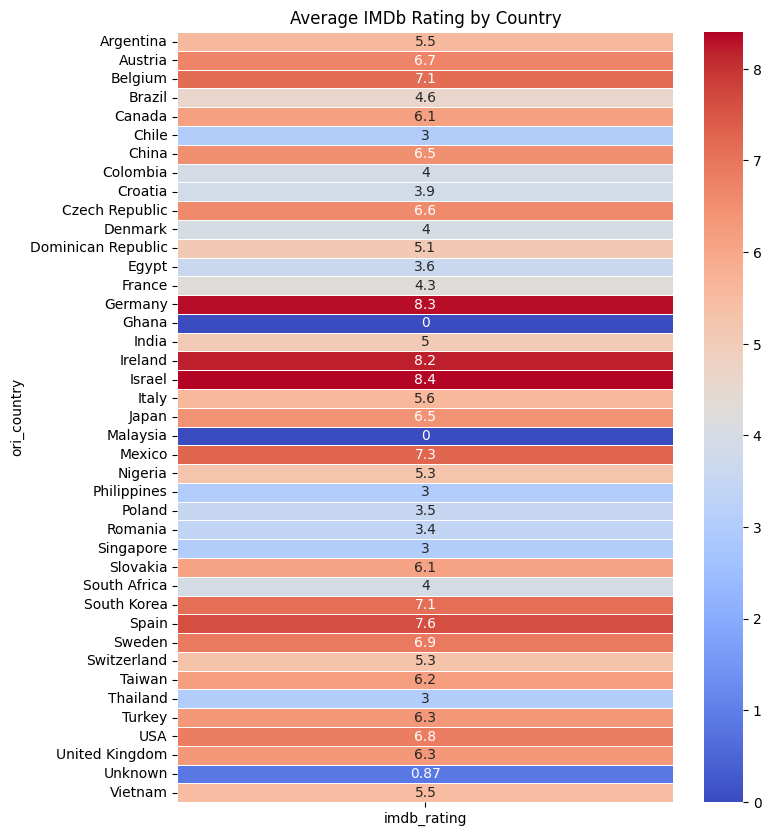

In [ ]:

data = df[['ori_country','title','imdb_rating']]

df = pd.DataFrame(data)

def classify_movie(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 5.0:
        return "Average"
    else:
        return "Bad"

df['Category'] = df['imdb_rating'].apply(classify_movie)

def highlight_category(row):
    if row['Category'] == 'Good':
        return ['background-color: lightgreen'] * len(row)
    elif row['Category'] == 'Average':
        return ['background-color: lightyellow'] * len(row)
    else:
        return ['background-color: lightcoral'] * len(row)

styled_df = df.style.apply(highlight_category, axis=1)

print(df)
plt.figure(figsize=(8, 10))
sns.heatmap(df.pivot_table(values='imdb_rating', index='ori_country', aggfunc='mean'), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Average IMDb Rating by Country")
plt.show()
